In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('loan_train.csv')
print(df.head())
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
print(df.head())
# Number of missing values
missing_values = df.isnull().sum()

# Outliers detection (assuming numerical columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
outliers = {}
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

# Print the results
print('shape of dataset:',df.shape)
print("Number of Missing Values:")
print(missing_values)
print("\nNumber of Outliers:")
print(outliers)


   Unnamed: 0.1  Unnamed: 0 loan_status  Principal  terms effective_date  \
0             0           0     PAIDOFF       1000     30       9/8/2016   
1             2           2     PAIDOFF       1000     30       9/8/2016   
2             3           3     PAIDOFF       1000     15       9/8/2016   
3             4           4     PAIDOFF       1000     30       9/9/2016   
4             6           6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male  
  loan_status  Principal  terms effective_date   due_date  age  \
0     PAIDOFF       1000     30       9/8/2016  10/7/2016   45   
1     PAIDOFF       1000     30       9/8/2016  10/7/2016   33   
2     PAIDOFF       1000     15       9/8/201

In [ ]:
# Distribution statistics (means, medians, quantiles)
distribution_stats = df.describe()
print("\nDistribution Statistics:")
print(distribution_stats)


Distribution Statistics:
         Principal       terms         age
count   346.000000  346.000000  346.000000
mean    943.641618   22.653179   30.939306
std     109.425530    7.991006    6.039418
min     300.000000    7.000000   18.000000
25%     900.000000   15.000000   27.000000
50%    1000.000000   30.000000   30.000000
75%    1000.000000   30.000000   35.000000
max    1000.000000   30.000000   51.000000


Distribution of each factor/variable/field


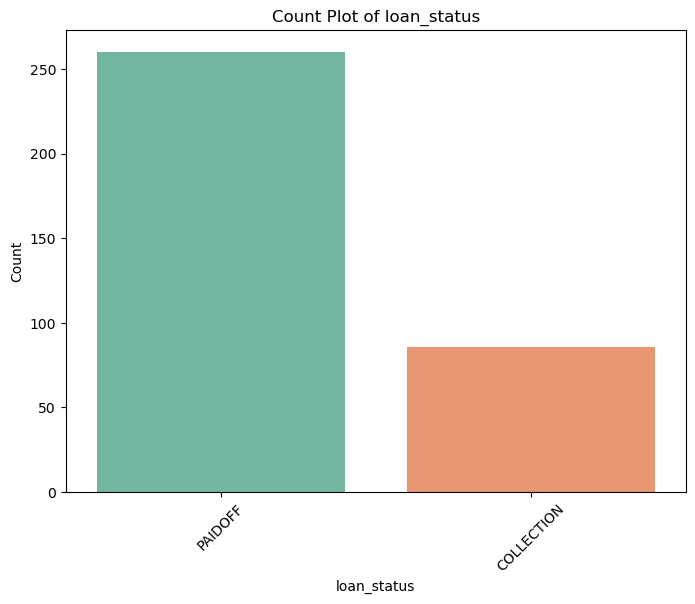

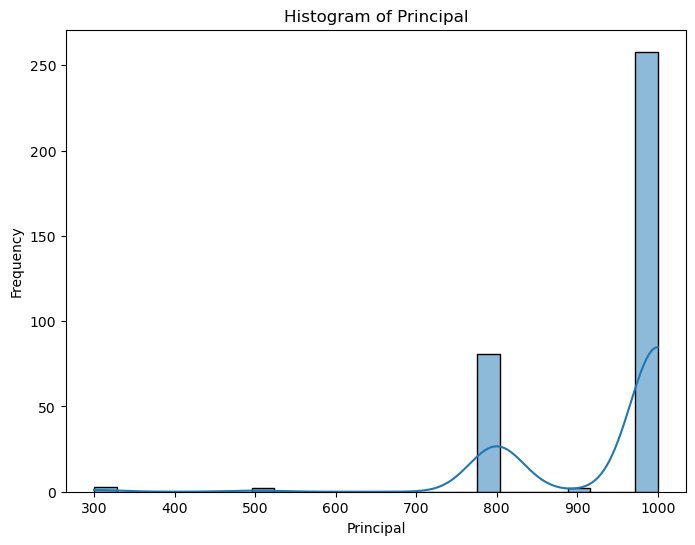

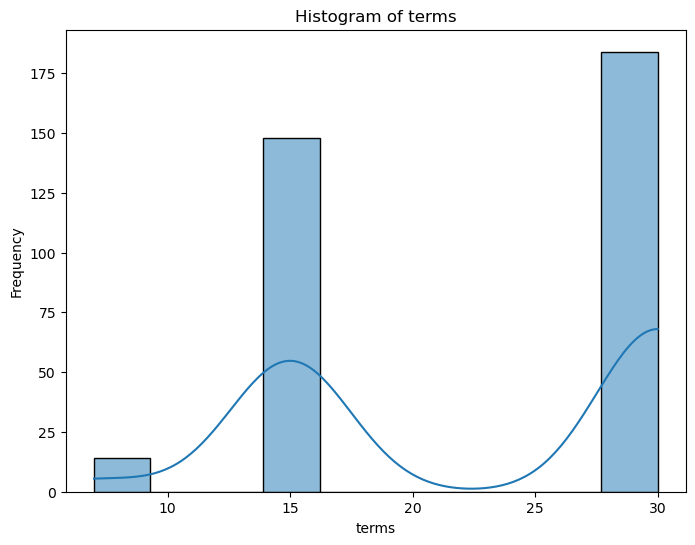

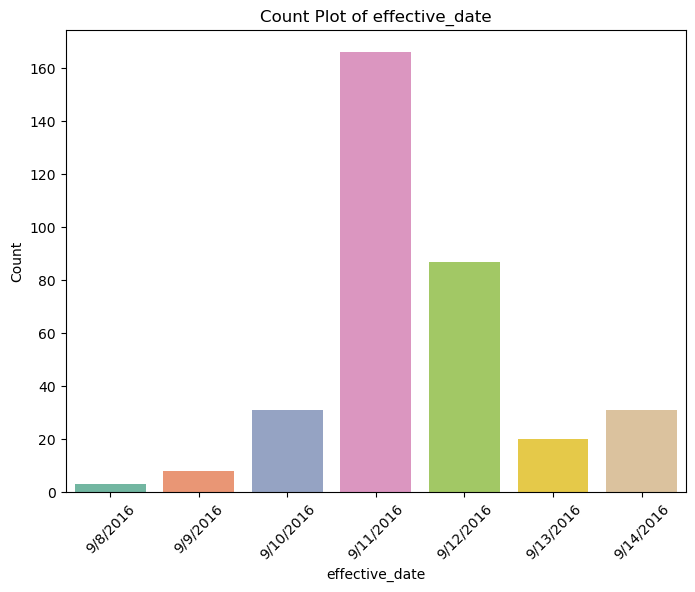

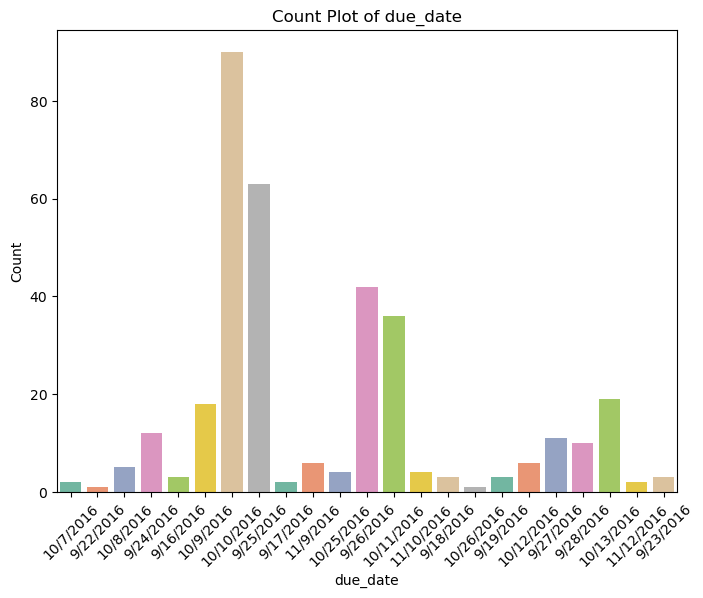

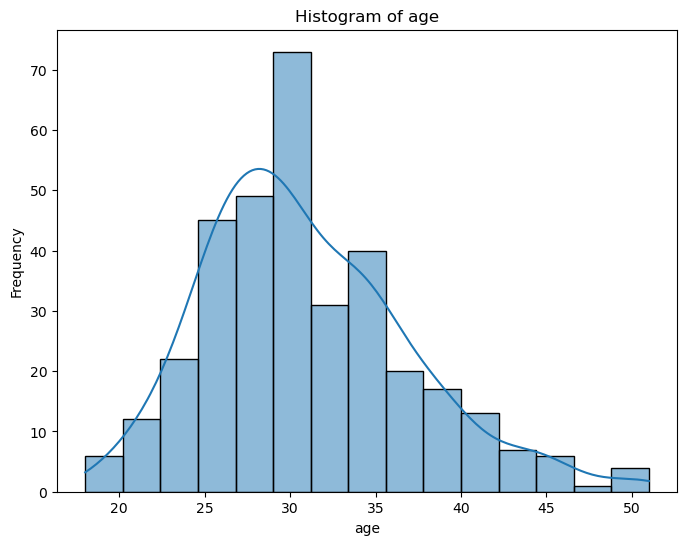

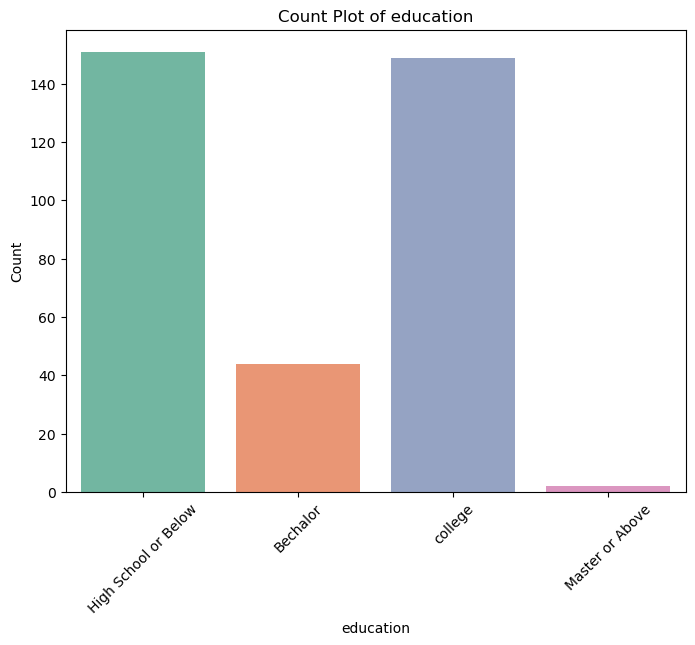

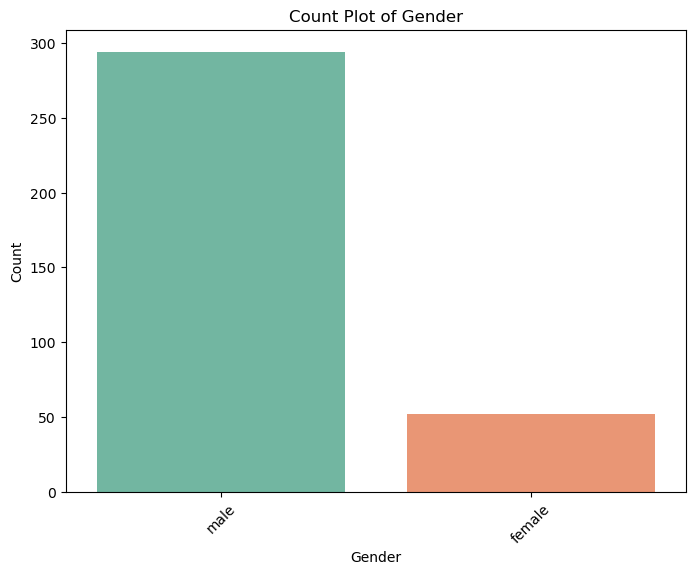

In [ ]:
# Visualization (histograms for numerical columns, count plots for categorical columns)
print('Distribution of each factor/variable/field')
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Load the dataset
loan_data =df

# Define features and target variable
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = selector(dtype_include=['int64', 'float64'])(X)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = selector(dtype_exclude=['int64', 'float64'])(X)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC score for Logistic Regression model
y_pred_proba_lr = pipeline.predict_proba(X_test)[:, 1]
auc_roc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print("AUC-ROC score for Logistic Regression model:", auc_roc_lr)



Accuracy: 0.6857142857142857

Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.17      0.14      0.15        14
     PAIDOFF       0.79      0.82      0.81        56

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.67      0.69      0.68        70

AUC-ROC score for Logistic Regression model: 0.603954081632653


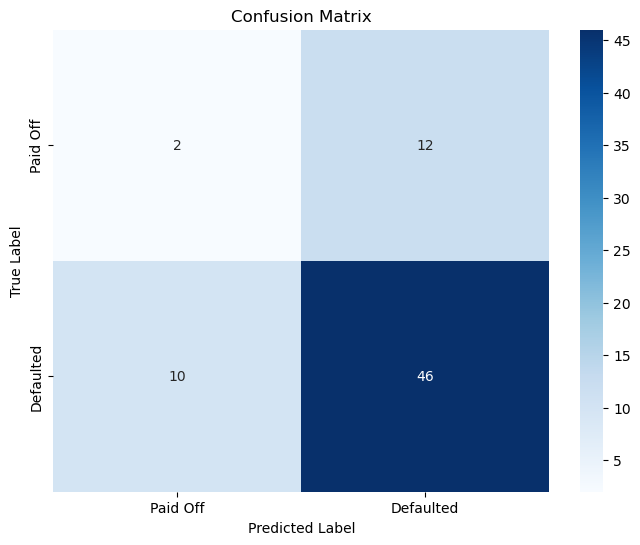

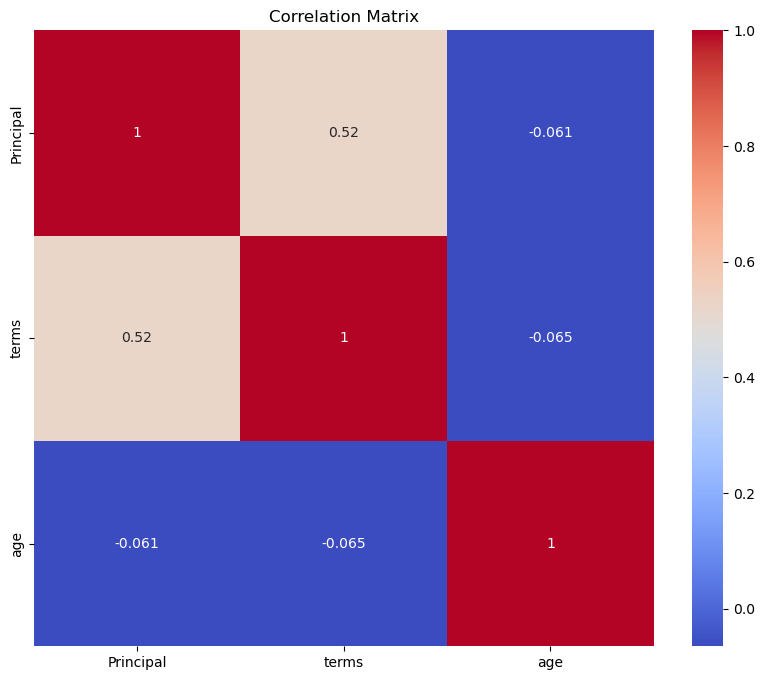

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
loan_data = df

# Assuming the SVM model is already trained and predictions are made
# Replace y_pred with the predictions made by your model
# Make sure y_pred is binary (0 or 1)
y_pred = pipeline.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Paid Off', 'Defaulted'], yticklabels=['Paid Off', 'Defaulted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Create correlation matrix
corr_matrix = loan_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Load the dataset
loan_data = df

# Define features and target variable
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = selector(dtype_include=['int64', 'float64'])(X)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = selector(dtype_exclude=['int64', 'float64'])(X)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate AUC-ROC score for KNN model
y_pred_proba_knn = pipeline.predict_proba(X_test)[:, 1]
auc_roc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print("AUC-ROC score for KNN model:", auc_roc_knn)



Accuracy: 0.7285714285714285

Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.14      0.07      0.10        14
     PAIDOFF       0.79      0.89      0.84        56

    accuracy                           0.73        70
   macro avg       0.47      0.48      0.47        70
weighted avg       0.66      0.73      0.69        70

AUC-ROC score for KNN model: 0.6721938775510203


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Load the dataset
loan_data =df

# Define features and target variable
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = selector(dtype_include=['int64', 'float64'])(X)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = selector(dtype_exclude=['int64', 'float64'])(X)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True))])  # Use probability=True for getting probability estimates

# Fit the model
pipeline.fit(X_train, y_train)

# Predict probabilities on test data
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score for SVM model:", auc_roc)


Accuracy: 0.7285714285714285

Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.14      0.07      0.10        14
     PAIDOFF       0.79      0.89      0.84        56

    accuracy                           0.73        70
   macro avg       0.47      0.48      0.47        70
weighted avg       0.66      0.73      0.69        70

AUC-ROC score for SVM model: 0.5886479591836734


In [ ]:
df=df
# Function to identify outliers using the quantile method
def identify_outliers(df, column):
    # Calculate the first quartile (Q1)
    Q1 = df[column].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower bound and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Function to drop outliers from the dataset
def drop_outliers(df, outliers):
    # Drop rows containing outliers
    df_cleaned = df.drop(outliers.index)

    return df_cleaned

# Identify outliers for each numerical variable in the dataset
outliers_dict = {}
for column in df.select_dtypes(include=['number']).columns:
    outliers_dict[column] = identify_outliers(df, column)

# Drop outliers for each variable
for column, outliers in outliers_dict.items():
    df = drop_outliers(df, outliers)

# Print the cleaned dataset
print("Cleaned Dataset after dropping outliers:")
df

Cleaned Dataset after dropping outliers:


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Load the dataset
loan_data =df

# Define features and target variable
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = selector(dtype_include=['int64', 'float64'])(X)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = selector(dtype_exclude=['int64', 'float64'])(X)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)
y_pred_lr=y_pred
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC score for Logistic Regression model
y_pred_proba_lr = pipeline.predict_proba(X_test)[:, 1]
auc_roc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print("AUC-ROC score for Logistic Regression model:", auc_roc_lr)



Accuracy: 0.7352941176470589

Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.60      0.16      0.25        19
     PAIDOFF       0.75      0.96      0.84        49

    accuracy                           0.74        68
   macro avg       0.67      0.56      0.54        68
weighted avg       0.71      0.74      0.67        68

AUC-ROC score for Logistic Regression model: 0.6981740064446832


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Load the dataset
loan_data = df

# Define features and target variable
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = selector(dtype_include=['int64', 'float64'])(X)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = selector(dtype_exclude=['int64', 'float64'])(X)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)
y_pred_knn=y_pred
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate AUC-ROC score for KNN model
y_pred_proba_knn = pipeline.predict_proba(X_test)[:, 1]
auc_roc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print("AUC-ROC score for KNN model:", auc_roc_knn)



Accuracy: 0.6470588235294118

Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.31      0.21      0.25        19
     PAIDOFF       0.73      0.82      0.77        49

    accuracy                           0.65        68
   macro avg       0.52      0.51      0.51        68
weighted avg       0.61      0.65      0.62        68

AUC-ROC score for KNN model: 0.6294307196562836


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Load the dataset
loan_data =df

# Define features and target variable
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = selector(dtype_include=['int64', 'float64'])(X)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = selector(dtype_exclude=['int64', 'float64'])(X)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True))])  # Use probability=True for getting probability estimates

# Fit the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_svm=y_pred
# Predict probabilities on test data
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score for SVM model:", auc_roc)


Accuracy: 0.6764705882352942

Classification Report:
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        19
     PAIDOFF       0.71      0.94      0.81        49

    accuracy                           0.68        68
   macro avg       0.35      0.47      0.40        68
weighted avg       0.51      0.68      0.58        68

AUC-ROC score for SVM model: 0.6036519871106337


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on training data
y_train_pred = pipeline.predict(X_train)

# Make predictions on test data
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy on training data
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on test data
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on training data:", accuracy_train)
print("Accuracy on test data:", accuracy_test)


Accuracy on training data: 0.7806691449814126
Accuracy on test data: 0.6764705882352942


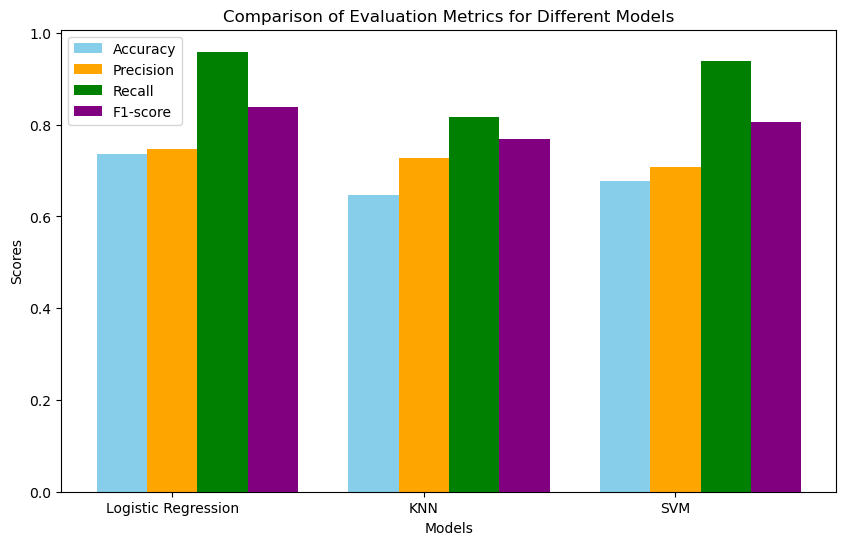

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='PAIDOFF')
recall_lr = recall_score(y_test, y_pred_lr, pos_label='PAIDOFF')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='PAIDOFF')

# Calculate metrics for KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label='PAIDOFF')
recall_knn = recall_score(y_test, y_pred_knn, pos_label='PAIDOFF')
f1_knn = f1_score(y_test, y_pred_knn, pos_label='PAIDOFF')

# Calculate metrics for SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='PAIDOFF')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='PAIDOFF')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='PAIDOFF')

# Create a bar plot
models = ['Logistic Regression', 'KNN', 'SVM']
accuracy_scores = [accuracy_lr, accuracy_knn, accuracy_svm]
precision_scores = [precision_lr, precision_knn, precision_svm]
recall_scores = [recall_lr, recall_knn, recall_svm]
f1_scores = [f1_lr, f1_knn, f1_svm]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x - width, accuracy_scores, width, label='Accuracy', color='skyblue')
plt.bar(x, precision_scores, width, label='Precision', color='orange')
plt.bar(x + width, recall_scores, width, label='Recall', color='green')
plt.bar(x + 2*width, f1_scores, width, label='F1-score', color='purple')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xticks(x, models)
plt.legend()
plt.show()


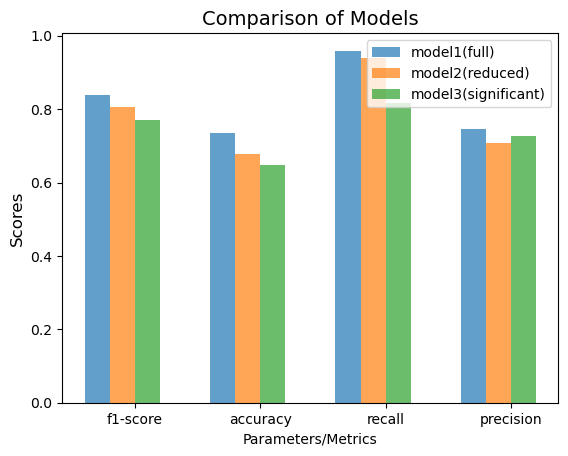

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# F1 score, accuracy, recall, precision values for each model

model1=[f1_lr,accuracy_lr,recall_lr,precision_lr]
model2=[f1_svm,accuracy_svm,recall_svm,precision_svm]
model3=[f1_knn,accuracy_knn,recall_knn,precision_knn]
# Metrics' names
metrics=['f1-score','accuracy','recall','precision']

# Bar width
bar_width = 0.2
index = np.arange(len(metrics))

# Plotting the bar graph
plt.bar(index, model1, width=bar_width, label='model1(full)', align='center', alpha=0.7)
plt.bar(index + bar_width, model2, width=bar_width, label='model2(reduced)', align='center', alpha=0.7)
plt.bar(index + 2*bar_width, model3, width=bar_width, label='model3(significant)', align='center', alpha=0.7)
# Adding labels
plt.xlabel('Parameters/Metrics')
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Models', fontsize=14)
plt.xticks(index + 1.5 * bar_width, metrics)
plt.legend()

# Display the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming loan_data is your dataset
loan_data=df
print(loan_data.head())


  loan_status  Principal  terms effective_date   due_date  age  \
0     PAIDOFF       1000     30       9/8/2016  10/7/2016   45   
1     PAIDOFF       1000     30       9/8/2016  10/7/2016   33   
2     PAIDOFF       1000     15       9/8/2016  9/22/2016   27   
3     PAIDOFF       1000     30       9/9/2016  10/8/2016   28   
4     PAIDOFF       1000     30       9/9/2016  10/8/2016   29   

              education  Gender  
0  High School or Below    male  
1              Bechalor  female  
2               college    male  
3               college  female  
4               college    male  
